In [12]:

import os
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
mlp.rcParams["figure.facecolor"] = "white"


path = './data/iharada/'
fname = path + 'arduino.csv'

df = pd.read_csv(fname, delimiter=',')
df.info()
df.head()
df['status']
#df.replace({ls: li for ls, li in zip(df['status'].unique(), range(len(df['status'].unique())))}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294400 entries, 0 to 294399
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   msec       294400 non-null  int64 
 1    voltage0  294400 non-null  int64 
 2    voltage1  294400 non-null  int64 
 3    voltage2  294400 non-null  int64 
 4    voltage3  294400 non-null  int64 
 5    voltage4  294400 non-null  int64 
 6    voltage5  294400 non-null  int64 
 7    status    294400 non-null  object
dtypes: int64(7), object(1)
memory usage: 18.0+ MB


KeyError: 'status'

In [7]:
def show_ard(data):
    t = data['msec']
    y = data['voltage']
    label = data['status']
    cmap = ListedColormap(['w', 'g', 'y', 'b', 'r'])

    points = np.array([t, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap)
    lc.set_array(np.array(label))

    plt.figure(figsize=(40, 4), dpi=50)

    ax = plt.subplot()
    ax.add_collection(lc)
    ax.set_xlim([0, max(t)])
    ax.set_ylim([0, 1024])
    ax.grid(True)
    plt.show()


def show_calc(data):
    left = np.array(range(len(data)))
    height = np.array(data['time'])
    result = np.array(data['result'])
    for i in range(len(left)):
        c = 'blue' if result[i] else 'red'
        plt.plot(left[i], height[i], color=c)
    plt.show()




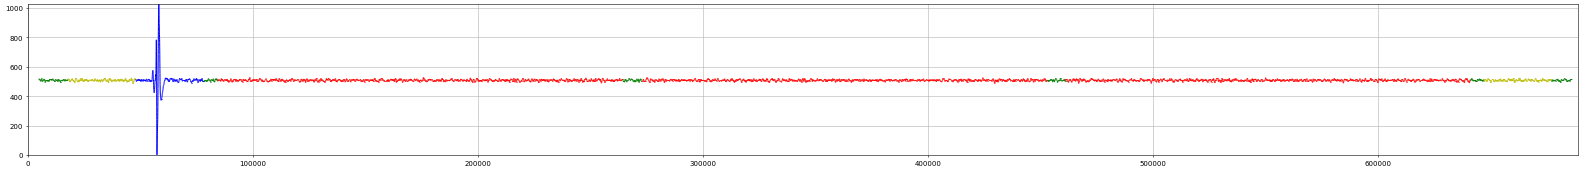

In [54]:
show_ard(df)